# Use OSMnx to get street networks by place name

In [1]:
import osmnx as ox
%matplotlib inline
ox.config(log_file=True, log_console=True, use_cache=True)

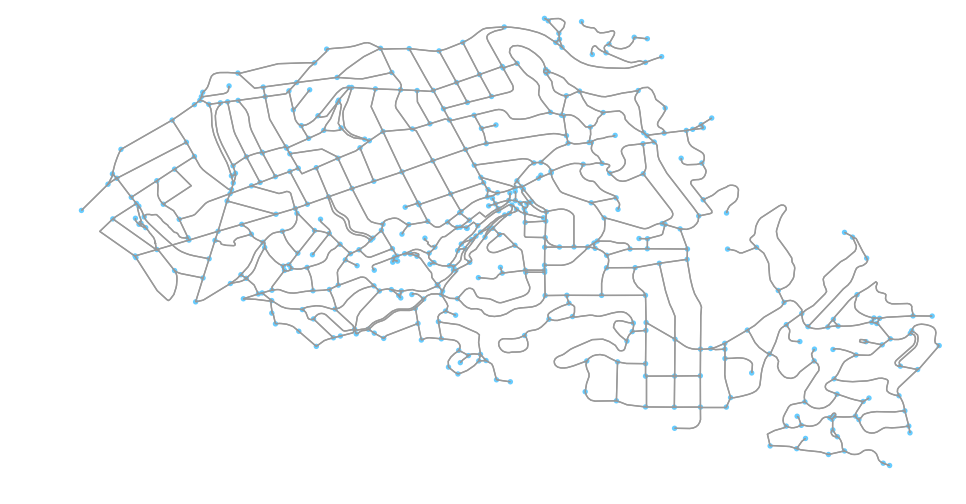

In [2]:
# get the walking network for piedmont
G = ox.graph_from_place('Piedmont, California, USA', network_type='walk')
fig, ax = ox.plot_graph(G)

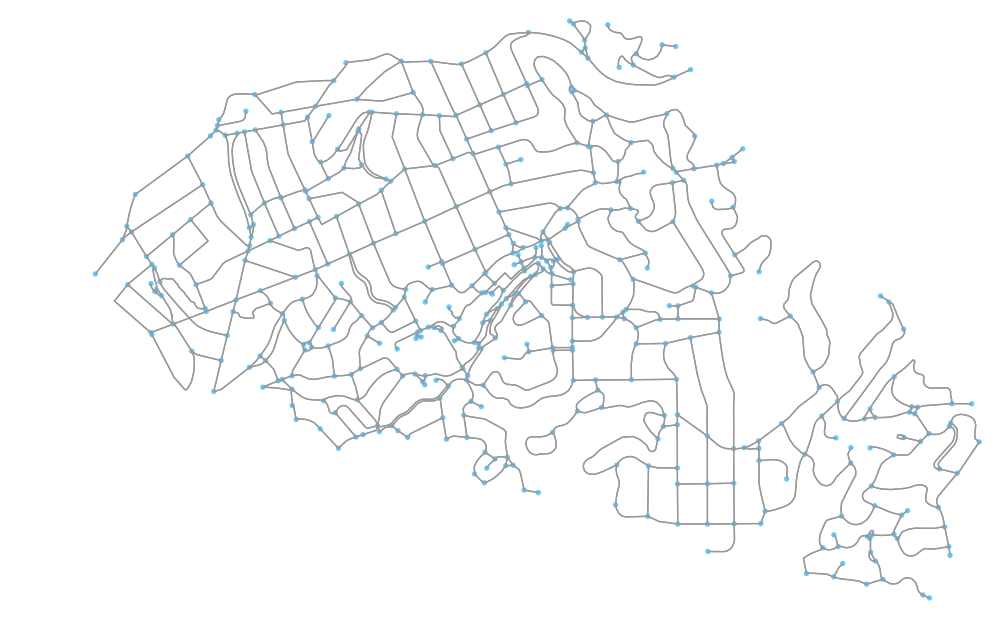

In [3]:
# project the network to an appropriate UTM (automatically determined)
G_projected = ox.project_graph(G)

# you can also plot/save figures as SVGs to work with in Illustrator later
fig, ax = ox.plot_graph(G_projected, save=True, file_format='svg')

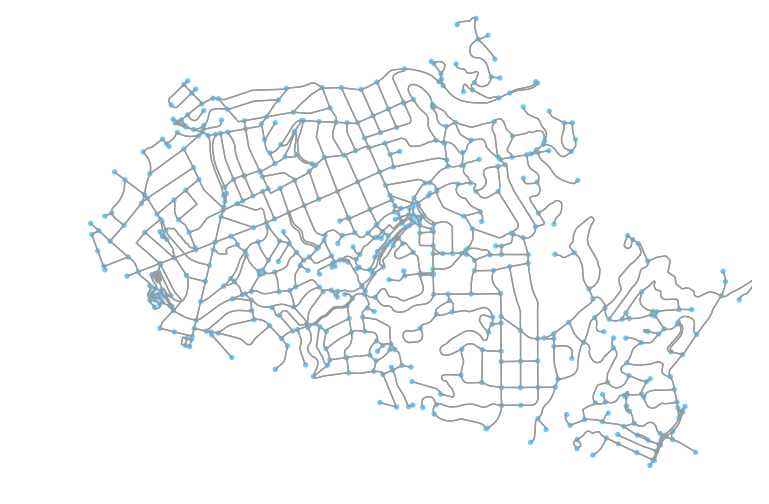

In [4]:
# you can also create a network with a buffer distance (meters) around the place
G = ox.graph_from_place('Piedmont, California, USA', network_type='walk', buffer_dist=200)
fig, ax = ox.plot_graph(ox.project_graph(G))

If you have a very large network (ie, large city or metropolitan-scale), it will be much faster to project the graph first, *then* simplify its topology.

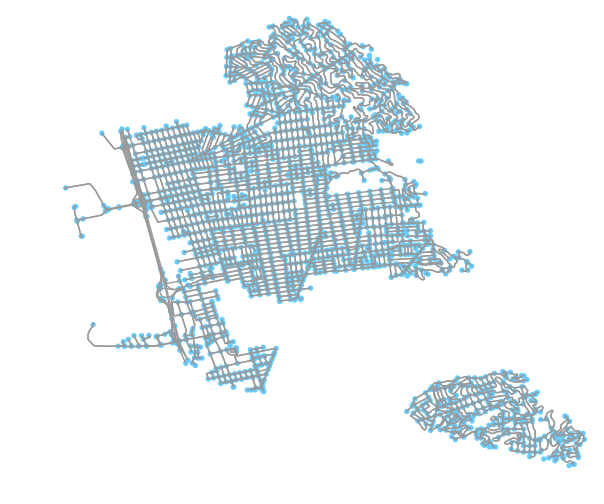

In [5]:
# create a network from multiple places
places = ['Piedmont, California, USA', 
          'Berkeley, California, USA',
          'Emeryville, California, USA']

# use retain_all if you want to keep all disconnected subgraphs (e.g. when your places aren't adjacent)
G = ox.graph_from_place(places, network_type='drive', retain_all=True)
fig, ax = ox.plot_graph(G, save=True, filename='places')

In [6]:
# save network to disk as GraphML file
ox.save_graphml(G, filename='berkeley-emeryville-piedmont.graphml')

# or save graph to disk as ESRI shapefile
ox.save_graph_shapefile(G, filename='berkeley-emeryville-piedmont')

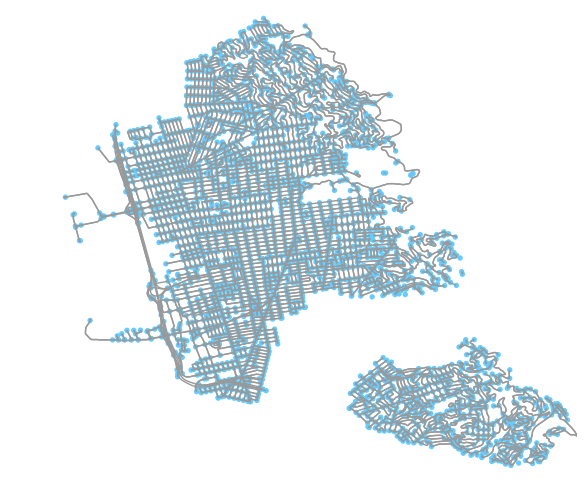

In [7]:
# you can also create a network with a buffer distance (meters) around the list of places
G = ox.graph_from_place(places, network_type='drive', retain_all=True, buffer_dist=500)
fig, ax = ox.plot_graph(G)

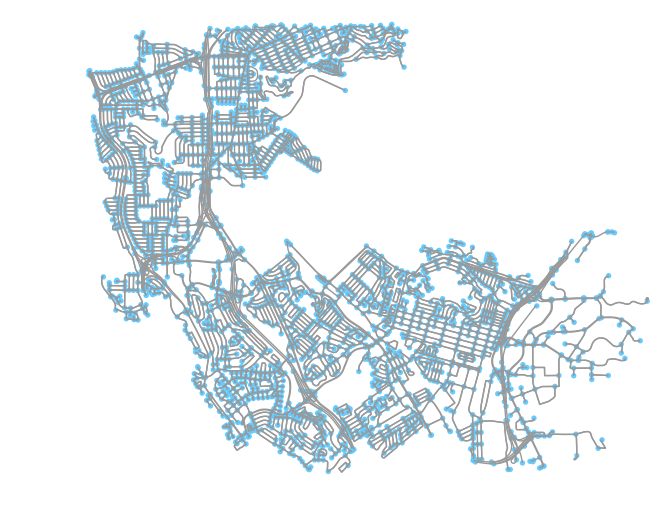

In [8]:
# or create a network from structured place queries
places = [{'city':'Daly City', 'state':'California'}, 
         {'city':'South San Francisco', 'state':'California'}]
G = ox.graph_from_place(places, network_type='drive', buffer_dist=250)
G_projected = ox.project_graph(G)
fig, ax = ox.plot_graph(G_projected)

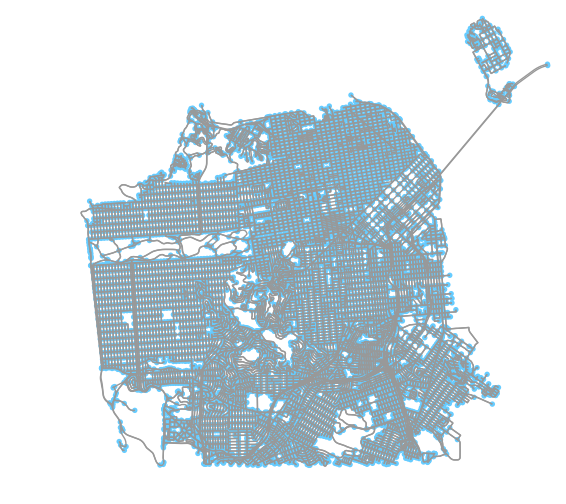

In [9]:
# get the network for all of SF
G = ox.graph_from_place('San Francisco, California, USA', network_type='drive')
G_projected = ox.project_graph(G)
fig, ax = ox.plot_graph(G_projected, save=True, filename='sf')

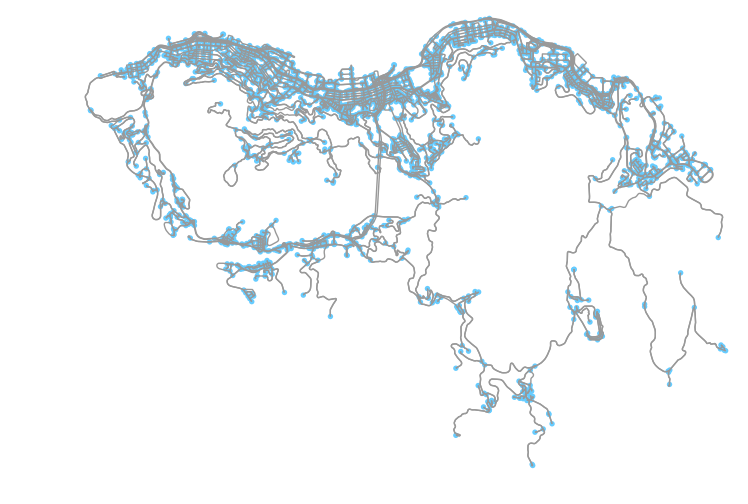

In [10]:
# create a network constrained to the shape of hong kong island
G = ox.graph_from_place('Hong Kong Island', which_result=2, network_type='drive')

# project the network to UTM (zone calculated automatically) then plot it
G_projected = ox.project_graph(G)
fig, ax = ox.plot_graph(G_projected)